In [1]:
%cd ../..

c:\Users\aldion\Desktop\Development\virtusize-algo


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from src.steps.load_data import load_experiment_data
from src.steps.predict import predict_serving_data
from src.steps.train import train
from src.utils.error_analyzer import ErrorAnalyzer
from src.utils.error_calculator import calculate_split_errors, get_split_error_data
from src.utils.ground_truths import get_ground_truth_values
from src.utils.metrics import MetricsManager
from src.utils.models import ModelNames, VirtusizeModels
from src.utils.predictions import get_train_val_test_predictions




In [3]:
experiment_data = load_experiment_data()
train_val_test = experiment_data.train_val_test

In [4]:
train_val_test.train.bust.features.head()

,gender,age,height,weight
664,1,17.0,1754.0,60.9
1013,0,34.0,1608.0,48.0
153,0,36.0,1672.0,60.7
392,0,48.0,1641.0,62.5
3598,1,54.0,1643.0,70.7


In [5]:
train_val_test.train.bust.targets.head()

664     830.0
1013    765.0
153     823.0
392     986.0
3598    976.0
Name: bust_circumference, dtype: float64

In [6]:
bust_model = LinearRegression()
hip_model = LinearRegression()
waist_model = LinearRegression()

models = VirtusizeModels(bust_model, hip_model, waist_model, names=ModelNames(bust="linreg_bust", hip="linreg_hip", waist="linreg_waist"))

In [7]:
train(models, train_val_test.train)


Training bust circumference  prediction model...
Training hip circumference prediction model...
Training waist circumference prediction model...
Training complete.


### Universal Metrics Analysis

In [8]:
predictions = get_train_val_test_predictions(models, train_val_test)

In [9]:
ground_truths = get_ground_truth_values(train_val_test)

In [10]:
metrics_manager = MetricsManager()
metrics = metrics_manager.update_metrics(ground_truths, predictions)

In [11]:
metrics

,train_mae,val_mae,test_mae,train_mse,val_mse,test_mse,train_r2,val_r2,test_r2
linreg_bust,24.420102,24.495043,25.575560,1000.508098,1024.448718,1072.655974,0.864413,0.853290,0.851172
linreg_hip,18.003647,19.177768,18.273748,567.438498,606.464928,556.578040,0.855504,0.836360,0.850557
linreg_waist,25.618633,26.060179,24.769386,1147.926836,1165.267531,998.036099,0.888864,0.886938,0.899209


In [12]:
metrics_manager.show_validation_metrics()

,val_mae,val_mse,val_r2
linreg_bust,24.495043,1024.448718,0.853290
linreg_hip,19.177768,606.464928,0.836360
linreg_waist,26.060179,1165.267531,0.886938


- The table above compares the performance of the classifiers using the metrics; mean absolute error (mae), mean squared error (mse) and r squared score, on the validation set. This performance sets a baseline for the experiment.
- Since this performance was obtained using basic linear regression classifiers with no feature engineering, it is anticipated that results will be improved by a minimum of 10% using a more sophisticated classifiers, as well as by employing feature engineering techniques.
- Furthermore, comparing the performance of the classifiers on the train and validation sets suggests that this performance can be generalized to unseen data.

### Error Analysis

In [13]:
split_errors = calculate_split_errors(ground_truths.val, predictions.val)

In [14]:
error_data = get_split_error_data(ground_truths.val, predictions.val, experiment_data.original_preprocessed)

In [15]:
error_data

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
9,1,17.0,1654.0,61.3,845.0,738.0,910.0,12.669293,-3.009310,4.764221,12.669293,3.009310,4.764221
11,0,58.0,1539.0,54.6,891.0,800.0,875.0,5.811936,31.774132,0.095323,5.811936,31.774132,0.095323
22,0,33.0,1605.0,58.0,872.0,756.0,945.0,3.781887,-9.553947,1.428474,3.781887,9.553947,1.428474
24,1,26.0,1786.0,72.8,971.0,813.0,940.0,-57.719938,19.026235,-13.271634,57.719938,19.026235,13.271634
32,1,24.0,1715.0,70.6,906.0,789.0,977.0,8.760304,-25.071048,17.617313,8.760304,25.071048,17.617313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,0,22.0,1535.0,42.5,744.0,626.0,794.0,28.758211,64.316014,13.530049,28.758211,64.316014,13.530049
5130,0,44.0,1628.0,59.3,915.0,770.0,926.0,-24.245310,9.478698,8.227626,24.245310,9.478698,8.227626
5132,1,32.0,1756.0,65.4,896.0,820.0,930.0,-20.570946,-14.053867,-58.101927,20.570946,14.053867,58.101927
5134,1,27.0,1760.0,75.0,930.0,845.0,983.0,7.048746,-10.597388,-15.169980,7.048746,10.597388,15.169980


In [16]:
error_analyzer = ErrorAnalyzer(error_data, column_num_categories_map={"age": 10, "weight": 10, "height": 10})

In [17]:
error_analyzer.get_category_means("gender")

,age,height,weight,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
gender,,,,,,,,,,,,
0,33.796392,1581.417526,56.604897,871.868557,755.912371,928.855670,1.280210,-0.290261,0.956119,25.766537,20.927459,28.573840
1,31.540682,1719.829396,71.408399,923.440945,822.645669,955.446194,3.965720,-3.313141,1.923982,23.200188,17.395931,23.500335


In [18]:
error_analyzer.get_category_counts("gender")

gender
0    388
1    381
dtype: int64

- The data above the baseline model performs slightly better for men in general. We see that the mean absolute errors for each target is higher for females with the biggest disparity coming in the prediction of waist circumference.
- Whereas this might indicate some bias to our model, it is not unreasonable to believe thT it is more difficult to predict bust, hip and waist circumference in women. This OCCURENCE may well then be seen in even more sophisticated models therefore.

In [19]:
error_analyzer.get_category_st_devs("gender")

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
gender,,,,,,,,,,,,,
0,0.000000,15.720736,57.415612,8.383898,77.880663,91.530416,53.723949,33.807477,26.741703,37.457354,21.924188,16.650659,24.238465
1,0.000000,14.449534,60.511423,12.170386,81.087263,100.117794,64.685635,29.772115,22.017088,30.306439,19.075037,13.896426,19.233205


- The standard deviations confirms that the models performed better when making predictions for males.

In [20]:
error_analyzer.get_category_counts("gender")

gender
0    388
1    381
dtype: int64

In [21]:
male_error_data = error_data[error_data["gender"] == 1]
female_error_data = error_data[error_data["gender"] == 0]

#### The charts below show the distributions of the absolute errors for both genders

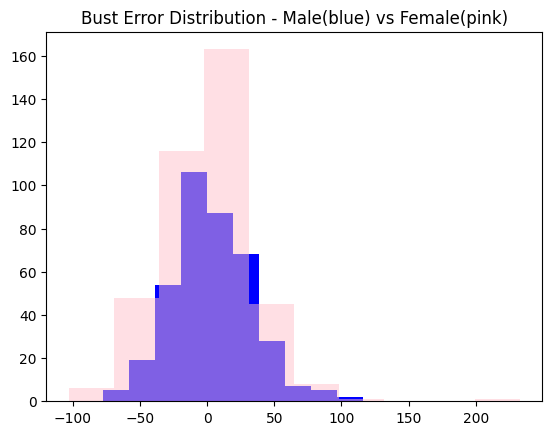

In [22]:
plt.hist(male_error_data["bust_errors"], bins=10, color="blue")
plt.hist(female_error_data["bust_errors"], alpha=0.5, bins=10, color="pink")
plt.title("Bust Error Distribution - Male(blue) vs Female(pink)")
plt.show()


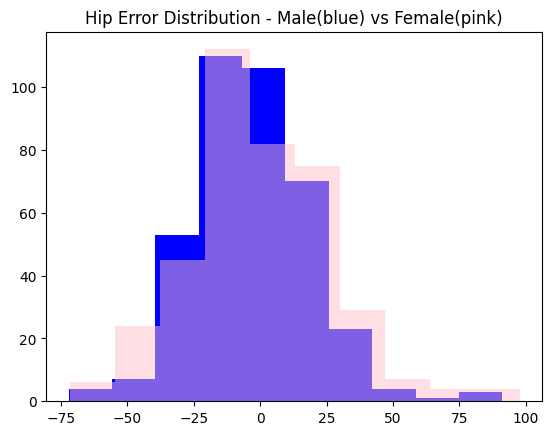

In [23]:
plt.hist(male_error_data["hip_errors"], bins=10, color="blue")
plt.hist(female_error_data["hip_errors"], alpha=0.5, bins=10, color="pink")
plt.title("Hip Error Distribution - Male(blue) vs Female(pink)")
plt.show()

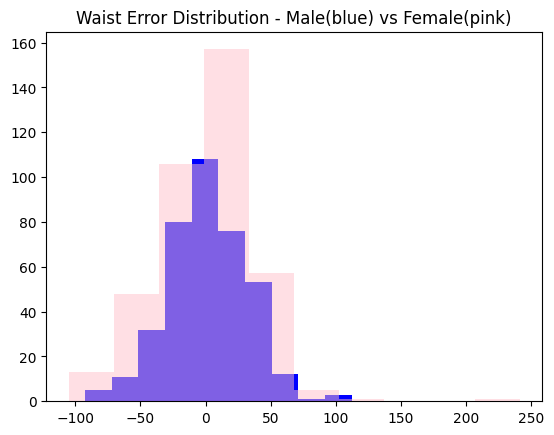

In [24]:
plt.hist(male_error_data["waist_errors"], bins=10, color="blue")
plt.hist(female_error_data["waist_errors"], alpha=0.5, bins=10, color="pink")
plt.title("Waist Error Distribution - Male(blue) vs Female(pink)")
plt.show()

- The graphs indicate a relatively similar distribution of errors but do confirm higher error rates when predicting female data.

### Further Error Analysis

In [25]:
error_analyzer.get_category_counts("age")

age
0    259
1     80
2     86
3     82
4     57
5     40
6     47
7     56
8     36
9     26
dtype: int64

In [26]:
error_analyzer.get_category_bin("age", 0)
# Most of the examples have individuals aged 15 to 20

(14.946, 20.4)

In [27]:
error_analyzer.get_category_means("age")

,gender,height,weight,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
age,,,,,,,,,,,,
0,0.513514,1662.366795,61.010425,857.243243,735.849421,934.563707,2.335925,-4.531785,-0.201242,23.575206,17.800848,22.504379
1,0.537500,1676.100000,65.787500,891.850000,776.862500,953.250000,3.510351,-1.313565,1.892902,21.858224,19.508954,25.047533
2,0.523256,1677.267442,67.083721,909.267442,795.174419,960.802326,0.750849,-3.666264,2.686560,23.379534,21.804506,28.549858
3,0.524390,1670.195122,67.046341,917.768293,812.073171,952.475610,-0.010264,1.798798,-1.829142,22.096069,14.576241,25.796960
4,0.614035,1664.631579,66.975439,916.105263,812.807018,949.315789,7.344420,-2.628348,8.771091,25.833339,16.088800,25.247417
5,0.400000,1617.050000,61.337500,896.100000,791.125000,923.800000,8.755073,2.212782,12.157860,25.699153,23.366542,34.383855
6,0.425532,1616.170213,66.459574,940.744681,856.914894,950.234043,5.903451,0.599263,-2.490260,26.886657,22.695694,25.295803
7,0.375000,1598.482143,64.594643,949.375000,854.464286,935.803571,-4.648072,5.302662,1.147578,27.330726,21.726310,31.140876
8,0.250000,1566.388889,62.022222,933.944444,854.416667,927.611111,8.392080,4.647321,1.642765,32.547324,19.712035,36.110144


- We can see that the model does generally worse for older people
- This is likely due to the underrepresentation of older groups in the dataset so will possibly also be in the case in  more sophisticated models.

In [28]:
error_analyzer.get_category_means("height")

,gender,age,weight,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
height,,,,,,,,,,,,
0,0.000000,46.928571,52.392857,884.714286,781.000000,894.428571,5.715668,10.541666,12.997597,20.150027,21.115807,30.358175
1,0.000000,45.564103,54.374359,897.871795,800.897436,905.179487,-5.681360,9.313048,-9.053707,26.500066,27.373447,28.278890
2,0.010638,37.489362,55.229787,876.106383,770.148936,921.712766,1.410625,-1.203024,-2.892043,27.877108,21.363303,31.711813
3,0.084615,33.669231,56.565385,870.069231,753.300000,928.938462,0.709267,-5.214652,2.017696,25.814256,19.839573,26.896485
4,0.330769,31.230769,59.563077,867.438462,756.230769,926.515385,6.719996,-0.339293,2.253220,23.839448,18.877204,26.573019
5,0.740385,31.605769,67.067308,911.250000,800.269231,946.451923,0.185515,-2.474753,5.006203,22.132063,18.337892,21.654764
6,0.941667,30.550000,70.316667,917.108333,810.958333,955.008333,2.331965,-5.356649,2.941796,22.529822,16.656912,22.597073
7,0.975610,27.731707,75.653659,938.268293,834.170732,977.743902,4.263387,-0.819579,1.810366,26.324123,17.430419,26.095630
8,1.000000,26.545455,76.129545,926.136364,823.159091,982.363636,6.272699,-6.013665,-2.808637,19.621654,15.968943,23.636883


In [30]:
error_analyzer.get_category_counts("height")

height
0     14
1     39
2     94
3    130
4    130
5    104
6    120
7     82
8     44
9     12
dtype: int64

- Baseline models does not perform well for very tall men.
- In general the baseline models perform worse for people whose heights lie further away from the central height values

In [31]:
error_analyzer.get_category_means("weight")

,gender,age,height,bust_circumference,waist_circumference,hip_circumference,bust_errors,hip_errors,waist_errors,bust_errors_absolute,hip_errors_absolute,waist_errors_absolute
weight,,,,,,,,,,,,
0,0.066667,28.693333,1566.146667,780.666667,661.080000,860.880000,13.864832,7.219238,5.400300,25.475654,18.556551,23.122479
1,0.191489,31.638298,1595.622340,843.643617,721.611702,903.765957,0.397322,-1.482358,3.017911,23.373561,18.284789,23.053987
2,0.399038,33.557692,1630.548077,889.658654,780.144231,937.884615,-2.250335,-7.650044,-3.886278,21.631442,19.621374,26.981614
3,0.822695,33.631206,1703.921986,929.808511,819.659574,955.879433,-5.424182,-3.720286,0.595975,25.484794,17.353877,26.643486
4,0.872340,35.819149,1717.457447,967.776596,875.542553,993.776596,10.854451,-1.783750,7.918340,25.983510,20.465327,26.782528
5,0.921053,33.500000,1749.657895,1018.421053,938.000000,1036.500000,10.979569,1.841123,0.726552,28.172061,19.664209,29.749851
6,0.933333,25.733333,1743.933333,1065.133333,1005.733333,1063.533333,20.021322,28.435380,-6.147107,34.531671,31.551582,40.488136
7,1.000000,31.428571,1784.714286,1092.571429,1040.714286,1114.000000,38.336683,9.654205,12.035282,41.194692,23.477688,36.528485
8,1.000000,22.000000,1806.500000,1128.000000,1061.000000,1159.000000,52.589759,20.632855,42.150885,52.589759,20.632855,42.150885


In [32]:
error_analyzer.get_category_counts("weight")

weight
0     75
1    188
2    208
3    141
4     94
5     38
6     15
7      7
8      2
9      1
dtype: int64

- As was the case with weights, we see where the model does comparatively worse as the weight of the individual increases. Interestingly however, we do not see this for outlier weights on the low side. Of course, this is perhaps mostly likely due to the comparative under representation of heavier people in the dataset. Since these heavier individuals in categories (6 - 10) as seen in the datframe are almost always men, the earlier drawn inference that the model performed better on average for males than females indicates that the models likely do very well for men of average height and weight in comparison to women of average height and weight

### Unseen Targets Test Set Predictions

In [34]:
predict_serving_data(models, "data/test.csv", save_path="data/baseline_predicted.csv")

,gender,age,height,weight,bust_circumference,hip_circumference,waist_circumference
0,M,27,"1,729",74.7,943.336452,972.549780,839.766710
1,M,25,"1,645",58.6,849.663513,888.030378,738.421168
2,M,28,"1,786",75.2,932.498644,971.450756,822.836616
3,M,19,"1,686",60.8,847.610217,901.207930,729.423327
4,M,24,"1,764",68.3,885.126269,936.090689,768.272694
...,...,...,...,...,...,...,...
1279,F,33,"1,618",54.0,843.853921,912.175479,719.593676
1280,F,25,"1,549",56.4,870.909512,934.064684,752.650340
1281,F,28,"1,623",58.5,868.994602,939.883794,745.508608
1282,F,34,"1,566",55.4,869.002888,922.590451,753.554326
